In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [12]:
x_train.shape

(60000, 28, 28)

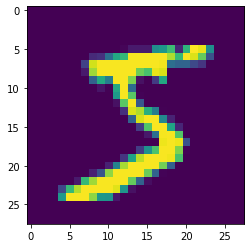

In [13]:
# mnist has grayscale images, below is default color mapping in matplotlib

single_image = x_train[0]

plt.imshow(single_image)

In [14]:
# One hot encoding is required

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(60000,)

In [19]:
y_cat_test = to_categorical(y_test)

In [20]:
y_cat_train = to_categorical(y_train)

In [23]:
single_image.min() # 0
single_image.max() # 255

255

In [24]:
x_train = x_train/255

In [25]:
x_test = x_test/255

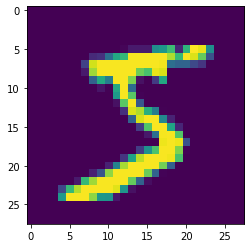

In [26]:
scaled_image = x_train[0]

scaled_image.min() # 0
scaled_image.max() # 1

# Since, the ratios are still the same, scaled image will be the same

plt.imshow(scaled_image)

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
# batch_size, width, height, number of color_channels (grayscale images(1))

x_train = x_train.reshape(60000, 28, 28, 1)

In [29]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
# Input -> Convolution Layer -> Pooling -> Flatten -> Output

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), strides = (1,1), 
                 input_shape = (28, 28, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 1)

In [38]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data = (x_test, y_cat_test),
         callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 418us/sample - loss: 0.1916 - accuracy: 0.9464 - val_loss: 0.0705 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 23s 389us/sample - loss: 0.0667 - accuracy: 0.9804 - val_loss: 0.0555 - val_accuracy: 0.9822
Epoch 3/10
60000/60000 [==============================] - 23s 380us/sample - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0467 - val_accuracy: 0.9837
Epoch 4/10
60000/60000 [==============================] - 26s 431us/sample - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0446 - val_accuracy: 0.9848
Epoch 5/10
60000/60000 [==============================] - 24s 400us/sample - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.0460 - val_accuracy: 0.9846


In [40]:
metrics = pd.DataFrame(model.history.history)

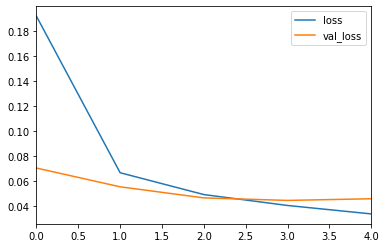

In [41]:
metrics[['loss', 'val_loss']].plot()

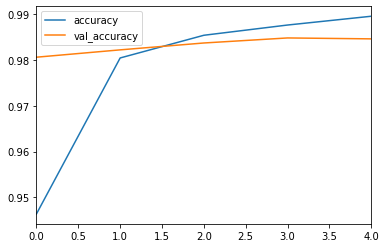

In [42]:
metrics[['accuracy', 'val_accuracy']].plot()

In [43]:
model.metrics_names

['loss', 'accuracy']

In [44]:
model.evaluate(x_test, y_cat_test, verbose = 0)

[0.04596396649004891, 0.9846]

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
predictions = model.predict_classes(x_test)

In [47]:
predictions.shape

(10000,)

In [48]:
y_cat_test.shape

(10000, 10)

In [49]:
y_test.shape

(10000,)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [51]:
my_number = x_test[0]

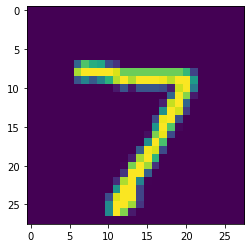

In [52]:
plt.imshow(my_number.reshape(28, 28))